In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

In [2]:
# load dataset
train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [3]:
# preprocessing stage
X_train_columns = train.columns.drop(['label'])
X_train = train[X_train_columns]
y_train = train['label']

In [4]:
# scaling stage
train_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = train_scaler.transform(X_train)
test_scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = test_scaler.transform(X_test)

In [5]:
## convert to numpy array for without scaled data=> suitale for sklearn
# X_train_as_np_format = X_train_scaled.values
# y_train__as_np_format = y_train.to_numpy()
# X_test_as_np_format = X_test_scaled.values
X_train_as_np_format = X_train_scaled
y_train__as_np_format = y_train.to_numpy()
X_test_as_np_format = X_test_scaled

In [23]:
# mlp_clf = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
#                         solver='sgd', tol=1e-4, random_state=1,
#                         learning_rate_init=.1, verbose=True)

mlp_clf = MLPClassifier(hidden_layer_sizes=(15, 5,), solver='adam', max_iter=100,
                        activation='relu', random_state=1, verbose=True)

In [24]:
mlp_clf.fit(X_train_as_np_format, y_train__as_np_format)
print(mlp_clf.score(X_train_as_np_format, y_train__as_np_format))

Iteration 1, loss = 1.09421335
Iteration 2, loss = 0.44865942
Iteration 3, loss = 0.33458821
Iteration 4, loss = 0.28895586
Iteration 5, loss = 0.26144693
Iteration 6, loss = 0.24297797
Iteration 7, loss = 0.22754673
Iteration 8, loss = 0.21577761
Iteration 9, loss = 0.20547500
Iteration 10, loss = 0.19728851
Iteration 11, loss = 0.18802881
Iteration 12, loss = 0.18149390
Iteration 13, loss = 0.17531773
Iteration 14, loss = 0.16918816
Iteration 15, loss = 0.16486899
Iteration 16, loss = 0.15968869
Iteration 17, loss = 0.15581434
Iteration 18, loss = 0.15181737
Iteration 19, loss = 0.14856187
Iteration 20, loss = 0.14526143
Iteration 21, loss = 0.14175220
Iteration 22, loss = 0.13857599
Iteration 23, loss = 0.13569700
Iteration 24, loss = 0.13265093
Iteration 25, loss = 0.13017979
Iteration 26, loss = 0.12754951
Iteration 27, loss = 0.12594823
Iteration 28, loss = 0.12373698
Iteration 29, loss = 0.12172466
Iteration 30, loss = 0.12010351
Iteration 31, loss = 0.11886571
Iteration 32, los

c:\users\imani\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
predicted = mlp_clf.predict(X_test_as_np_format)

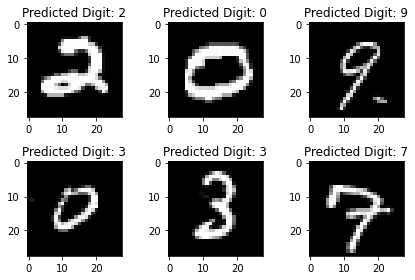

In [26]:
X_test_numpy = X_test.to_numpy().reshape(28000, 28, 28)
# fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_test_numpy[i], cmap='gray')
    plt.title(f'Predicted Digit: {predicted[i]}')
plt.show()
